In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_savant_raw = pd.read_csv('savant_data_2021_2023.csv')
df_people = pd.read_csv('lahman_people.csv')

In [5]:
df_savant_raw['year'] = df_savant_raw['game_date'].str[:4].astype(int)

In [6]:
df_players = pd.concat([df_people.assign(year=i) for i in range(2021, 2024)], ignore_index=True)
df_players = df_players[df_players['player_mlb_id'].notna()]

In [7]:
at_bat_ids = df_savant_raw[['batter','pitcher','game_date','year','times_faced']].drop_duplicates()
at_bat_ids['at_bat_id'] = range(1, len(at_bat_ids) + 1)
df_savant = df_savant_raw.merge(at_bat_ids, on=['batter','pitcher','game_date','year','times_faced'],how='inner')

In [9]:
bf_counts = at_bat_ids.groupby(['pitcher','year'])['at_bat_id'].nunique().reset_index(name='total_bf')
df_players = df_players.merge(bf_counts,
                              left_on=['player_mlb_id','year'],
                              right_on=['pitcher','year'],
                              how='left'
                             ).drop(columns='pitcher')
df_players['total_bf'] = df_players['total_bf'].fillna(0).astype(int)

In [10]:
df_pitcher_info = df_savant_raw[['pitcher','p_throws']].drop_duplicates()
df_pitch_info = df_savant_raw[['pitch_type','release_speed','release_pos_x','release_pos_y','release_pos_z','release_spin_rate','release_extension']]

In [11]:
df_full_pitch_info = df_savant_raw[['pitcher','p_throws','pitch_type','release_speed','release_pos_x','release_pos_y','release_pos_z','release_spin_rate','release_extension']]

In [12]:
df_full_pitch_info.head()

,pitcher,p_throws,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension
0,4f902241478a103f7a818f5be9a7b7ddf43cabb9,L,FF,93.2,0.84,53.47,5.74,2351.0,7.0
1,4f902241478a103f7a818f5be9a7b7ddf43cabb9,L,SL,82.9,1.03,53.66,5.69,2408.0,6.8
2,afb9b85defc6fe5c3f48681480eff4d96ab723c7,R,FF,94.6,-1.85,54.12,5.77,2264.0,6.4
3,0f061b9439845159c394a71e55d635b10ca25656,L,FF,97.1,1.86,54.08,6.57,2257.0,6.4
4,4f902241478a103f7a818f5be9a7b7ddf43cabb9,L,FF,93.6,0.60,53.45,5.85,2233.0,7.1


In [13]:
df_full_pitch_info.groupby(['p_throws'])['release_speed'].mean()

p_throws
L    87.961038
R    89.279641
Name: release_speed, dtype: float64

In [35]:
df_full_pitch_info.groupby(['p_throws'])['release_spin_rate'].mean()

p_throws
L    2190.95509
R    2262.57140
Name: release_spin_rate, dtype: float64

In [37]:
df_full_pitch_info.groupby(['pitch_type'])['release_speed'].mean()

pitch_type
CH    85.194678
CS    67.631683
CU    78.878982
EP    48.997253
FA    69.154792
FC    89.006994
FF    93.939048
FO    82.967738
FS    86.490498
KC    81.213525
KN    74.067986
PO    89.579167
SC    80.214667
SI    93.192988
SL    84.965771
ST    81.701641
SV    82.306737
Name: release_speed, dtype: float64

In [39]:
df_full_pitch_info.groupby(['pitch_type'])['release_spin_rate'].mean()

pitch_type
CH    1763.652985
CS    2289.119601
CU    2520.565480
EP    1190.195122
FA    1692.767017
FC    2373.866855
FF    2277.032772
FO    1079.639687
FS    1372.971009
KC    2498.307196
KN     370.158273
PO    2188.383333
SC    2092.960000
SI    2137.208506
SL    2407.081617
ST    2582.855070
SV    2576.611119
Name: release_spin_rate, dtype: float64

In [14]:
df_pitcher_info.head()

,pitcher,p_throws
0,4f902241478a103f7a818f5be9a7b7ddf43cabb9,L
2,afb9b85defc6fe5c3f48681480eff4d96ab723c7,R
3,0f061b9439845159c394a71e55d635b10ca25656,L
11,e4d5ba68d53a3c6d7fe36e1a527a907c46830d75,R
12,e6822c35620fc9837800588826173a2153b69478,R


In [15]:
df_pitch_info.head()

,pitch_type,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension
0,FF,93.2,0.84,53.47,5.74,2351.0,7.0
1,SL,82.9,1.03,53.66,5.69,2408.0,6.8
2,FF,94.6,-1.85,54.12,5.77,2264.0,6.4
3,FF,97.1,1.86,54.08,6.57,2257.0,6.4
4,FF,93.6,0.60,53.45,5.85,2233.0,7.1


<Axes: xlabel='total_bf', ylabel='Count'>

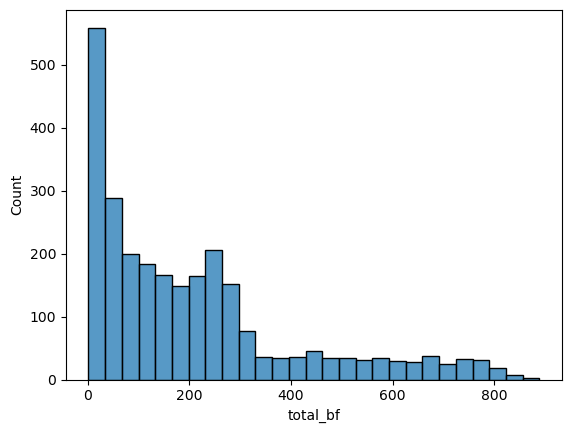

In [43]:
sns.histplot(bf_counts['total_bf'])

<Axes: xlabel='release_speed', ylabel='Count'>

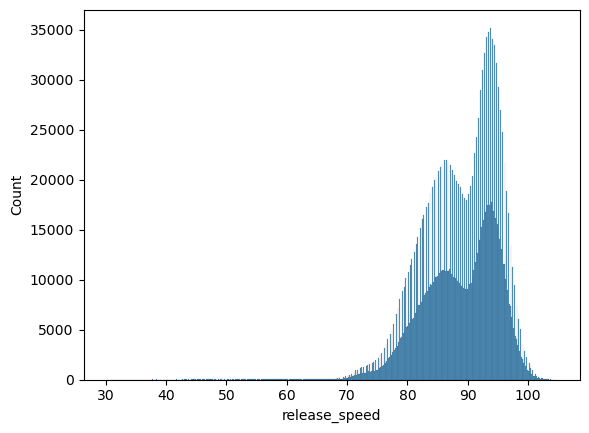

In [17]:
sns.histplot(df_pitch_info['release_speed'])

<Axes: xlabel='release_spin_rate', ylabel='Count'>

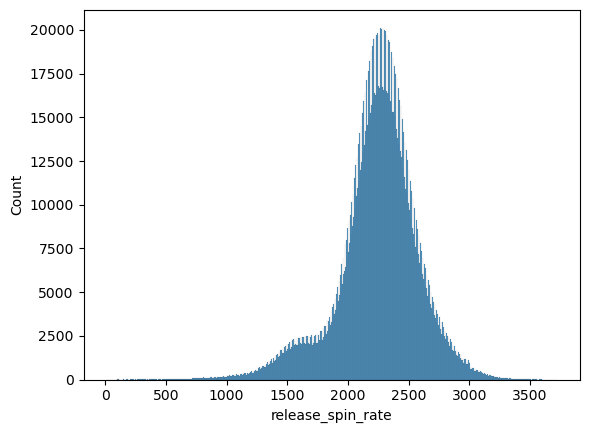

In [18]:
sns.histplot(df_pitch_info['release_spin_rate'])

<Axes: xlabel='p_throws', ylabel='Count'>

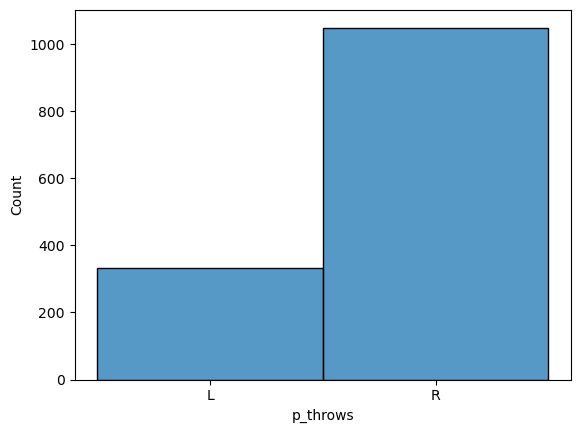

In [19]:
sns.histplot(df_pitcher_info['p_throws'])